In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [3]:
recipies=pd.read_csv("recipes_muffins_cupcakes.csv")

In [5]:
recipies.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


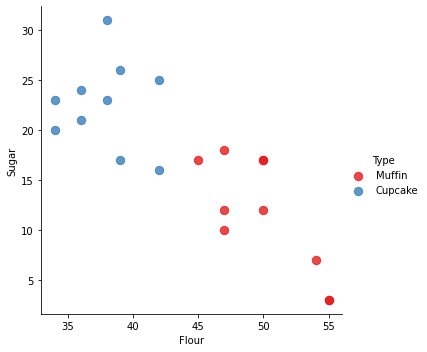

In [8]:
sns.lmplot('Flour','Sugar',data=recipies,hue='Type',
           palette='Set1',fit_reg=False, scatter_kws={"s":70});

In [26]:
type_label=np.where(recipies['Type']=='Muffin',0,1)
recipie_feature=recipies.columns.values[1:].tolist()
recipie_feature
ingredients=recipies[recipie_feature].values
print(ingredients)

[[55 28  3  7  5  2  0  0]
 [47 24 12  6  9  1  0  0]
 [47 23 18  6  4  1  0  0]
 [45 11 17 17  8  1  0  0]
 [50 25 12  6  5  2  1  0]
 [55 27  3  7  5  2  1  0]
 [54 27  7  5  5  2  0  0]
 [47 26 10 10  4  1  0  0]
 [50 17 17  8  6  1  0  0]
 [50 17 17 11  4  1  0  0]
 [39  0 26 19 14  1  1  0]
 [42 21 16 10  8  3  0  0]
 [34 17 20 20  5  2  1  0]
 [39 13 17 19 10  1  1  0]
 [38 15 23 15  8  0  1  0]
 [42 18 25  9  5  1  0  0]
 [36 14 21 14 11  2  1  0]
 [38 15 31  8  6  1  1  0]
 [36 16 24 12  9  1  1  0]
 [34 17 23 11 13  0  1  0]]


In [28]:
model=svm.SVC(kernel='linear')
model.fit(ingredients,type_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
w=model.coef_[0]
a=-w[0]/w[1]
xx=np.linspace(30,60)
yy=a*xx-(model.intercept_[0])/w[1]

b=model.support_vectors_[0]
yy_down=a*xx+(b[1]-a*b[0])
b=model.support_vectors_[-1]
yy_up=a*xx+(b[1]-a*b[0])

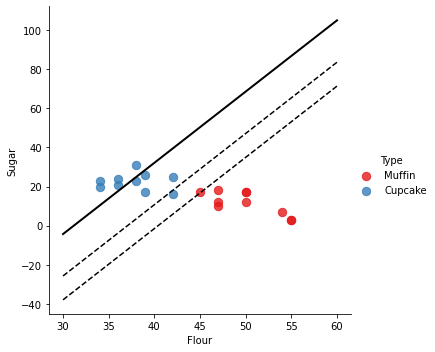

In [36]:
sns.lmplot('Flour','Sugar',data=recipies,hue='Type',palette='Set1',fit_reg=False,scatter_kws={"s":70})
plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')

In [43]:
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')      